In [6]:
import pandas as pd
import os
def data_dictionary():
    path_train="/kaggle/input/dateset-23-skin/dataset/"
    list_train=os.listdir(path_train)
    train_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        
        path_disease_train=path_train+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j   
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(k)     
        k+=1
    train_df=pd.DataFrame(train_dictionary)
    return  train_df

In [7]:
import gc


812

In [8]:
data=data_dictionary()

In [9]:
lable=data['target']

In [10]:

images=[]
label=[]
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
for i in data['image_path']:
    img = load_img(i, target_size=(100, 100))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    images.append(x) 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [11]:
import numpy as np
import pandas as pd
dataset=np.array(images)


In [12]:
dataset.shape

(23184, 1, 100, 100, 3)

In [13]:
dataset = np.reshape(dataset, (23184, 100, 100, 3))

In [14]:
lable=np.array(lable)

In [15]:
import tensorflow as tf

In [16]:


from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load the pretrained VGG19 model without the top (fully connected) layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(100, 100, 3))


80134624/80134624 [==============================] - 0s 0us/step


In [17]:

# Add a global average pooling layer to reduce the spatial dimensions of the features
x = base_model.output
x = GlobalAveragePooling2D()(x)
# Add a fully connected layer with 256 units and ReLU activation
x = Dense(256, activation='relu')(x)
# Add the final classification layer with the number of classes in your dataset
predictions = Dense(23, activation='softmax')(x)
# Create the model with the base VGG19 model as input and the new classification layers on top
model = Model(inputs=base_model.input, outputs=predictions)



In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [19]:


# Freeze the weights of the base VGG19 model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, lable, test_size=0.2,random_state=44)
#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2,random_state=1)


In [21]:
X_train.shape

(18547, 100, 100, 3)

In [23]:
X_train.shape

(18547, 100, 100, 3)

In [24]:
import keras
acc=[]
num_classes = 23
y_test = keras.utils.to_categorical(y_test, num_classes)

In [25]:
y_train = keras.utils.to_categorical(y_train, num_classes)

In [26]:
del images

In [27]:
del dataset


In [28]:
gc.collect()

126

In [29]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=16,verbose=1) 


Epoch 1/10
1160/1160 [==============================] - 48s 33ms/step - loss: 2.2049 - accuracy: 0.4486 - val_loss: 1.2704 - val_accuracy: 0.6293
Epoch 2/10
1160/1160 [==============================] - 37s 32ms/step - loss: 0.8751 - accuracy: 0.7398 - val_loss: 0.8646 - val_accuracy: 0.7447
Epoch 3/10
1160/1160 [==============================] - 37s 32ms/step - loss: 0.4881 - accuracy: 0.8521 - val_loss: 0.6485 - val_accuracy: 0.8070
Epoch 4/10
1160/1160 [==============================] - 37s 32ms/step - loss: 0.3427 - accuracy: 0.8941 - val_loss: 0.5589 - val_accuracy: 0.8352
Epoch 5/10
1160/1160 [==============================] - 37s 32ms/step - loss: 0.2702 - accuracy: 0.9131 - val_loss: 0.4842 - val_accuracy: 0.8678
Epoch 6/10
1160/1160 [==============================] - 33s 29ms/step - loss: 0.1977 - accuracy: 0.9387 - val_loss: 0.5468 - val_accuracy: 0.8549
Epoch 7/10
1160/1160 [==============================] - 37s 32ms/step - loss: 0.2112 - accuracy: 0.9324 - val_loss: 0.4206 -

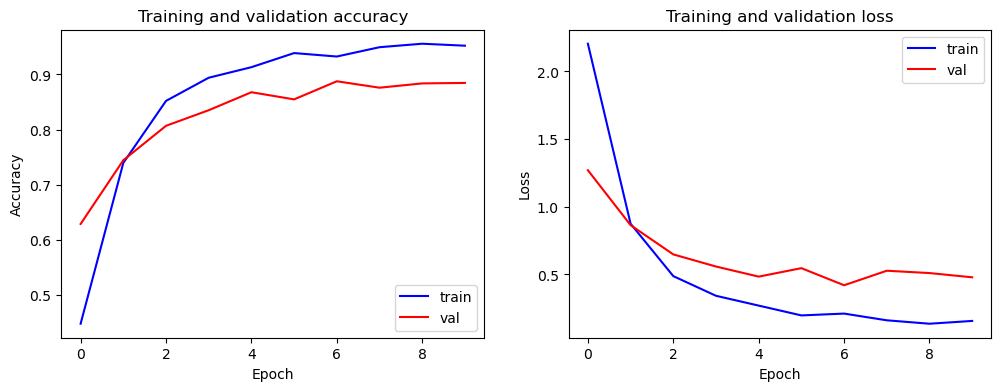

In [30]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(train_accuracy))
plt.figure(figsize=(12,4))

# Plotting the accuracy
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')

# Plotting the loss
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

In [32]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_pred

145/145 [==============================] - 8s 43ms/step


array([12, 19, 17, ...,  2, 10,  9])

In [33]:
y_test=np.argmax(y_test, axis=1)

In [34]:
from sklearn.metrics import *
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       206
           1       0.92      0.86      0.89       199
           2       0.80      0.93      0.86       194
           3       0.89      0.84      0.86       167
           4       0.86      0.83      0.84       208
           5       0.93      0.90      0.91       216
           6       0.90      0.88      0.89       222
           7       0.83      0.88      0.85       200
           8       0.89      0.92      0.91       208
           9       0.81      0.78      0.79       196
          10       0.94      0.93      0.94       222
          11       0.90      0.84      0.87       182
          12       0.98      0.94      0.96       211
          13       0.79      0.79      0.79       204
          14       0.92      0.82      0.86       186
          15       0.95      0.88      0.91       178
          16       0.89      0.94      0.92       211
          17       0.95    

In [35]:
acc=accuracy_score(y_test,y_pred)

In [36]:
acc

0.8846236791028682